<a href="https://colab.research.google.com/github/CM-007/DS_ASS/blob/main/Ass16_Neural_Networks(fireforests).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import libraries**

In [1]:
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
import numpy as np

# **Load data set**

In [2]:
data = pd.read_csv('/content/forestfires.csv')

# **E D A**

In [3]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
data.shape

(517, 31)

In [5]:
data.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [6]:
data.describe()
#  we found huge diffrence between data points

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [8]:
data.duplicated().sum()

8

In [11]:
data =data.drop_duplicates()

In [12]:
data.duplicated().sum()

0

In [13]:
data.shape

(509, 31)

## **Missing Values and Imputaion**

In [14]:
data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

<Axes: >

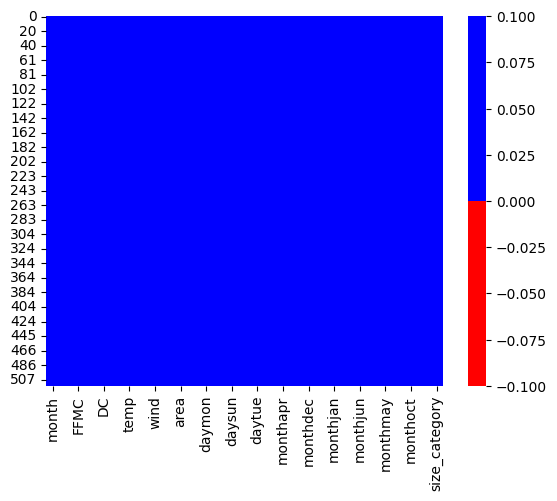

In [15]:
import seaborn as sns
cols = data.columns
colours = ['Red','Blue']

sns.heatmap(data[cols].isnull(),
            cmap=sns.color_palette(colours)
            )

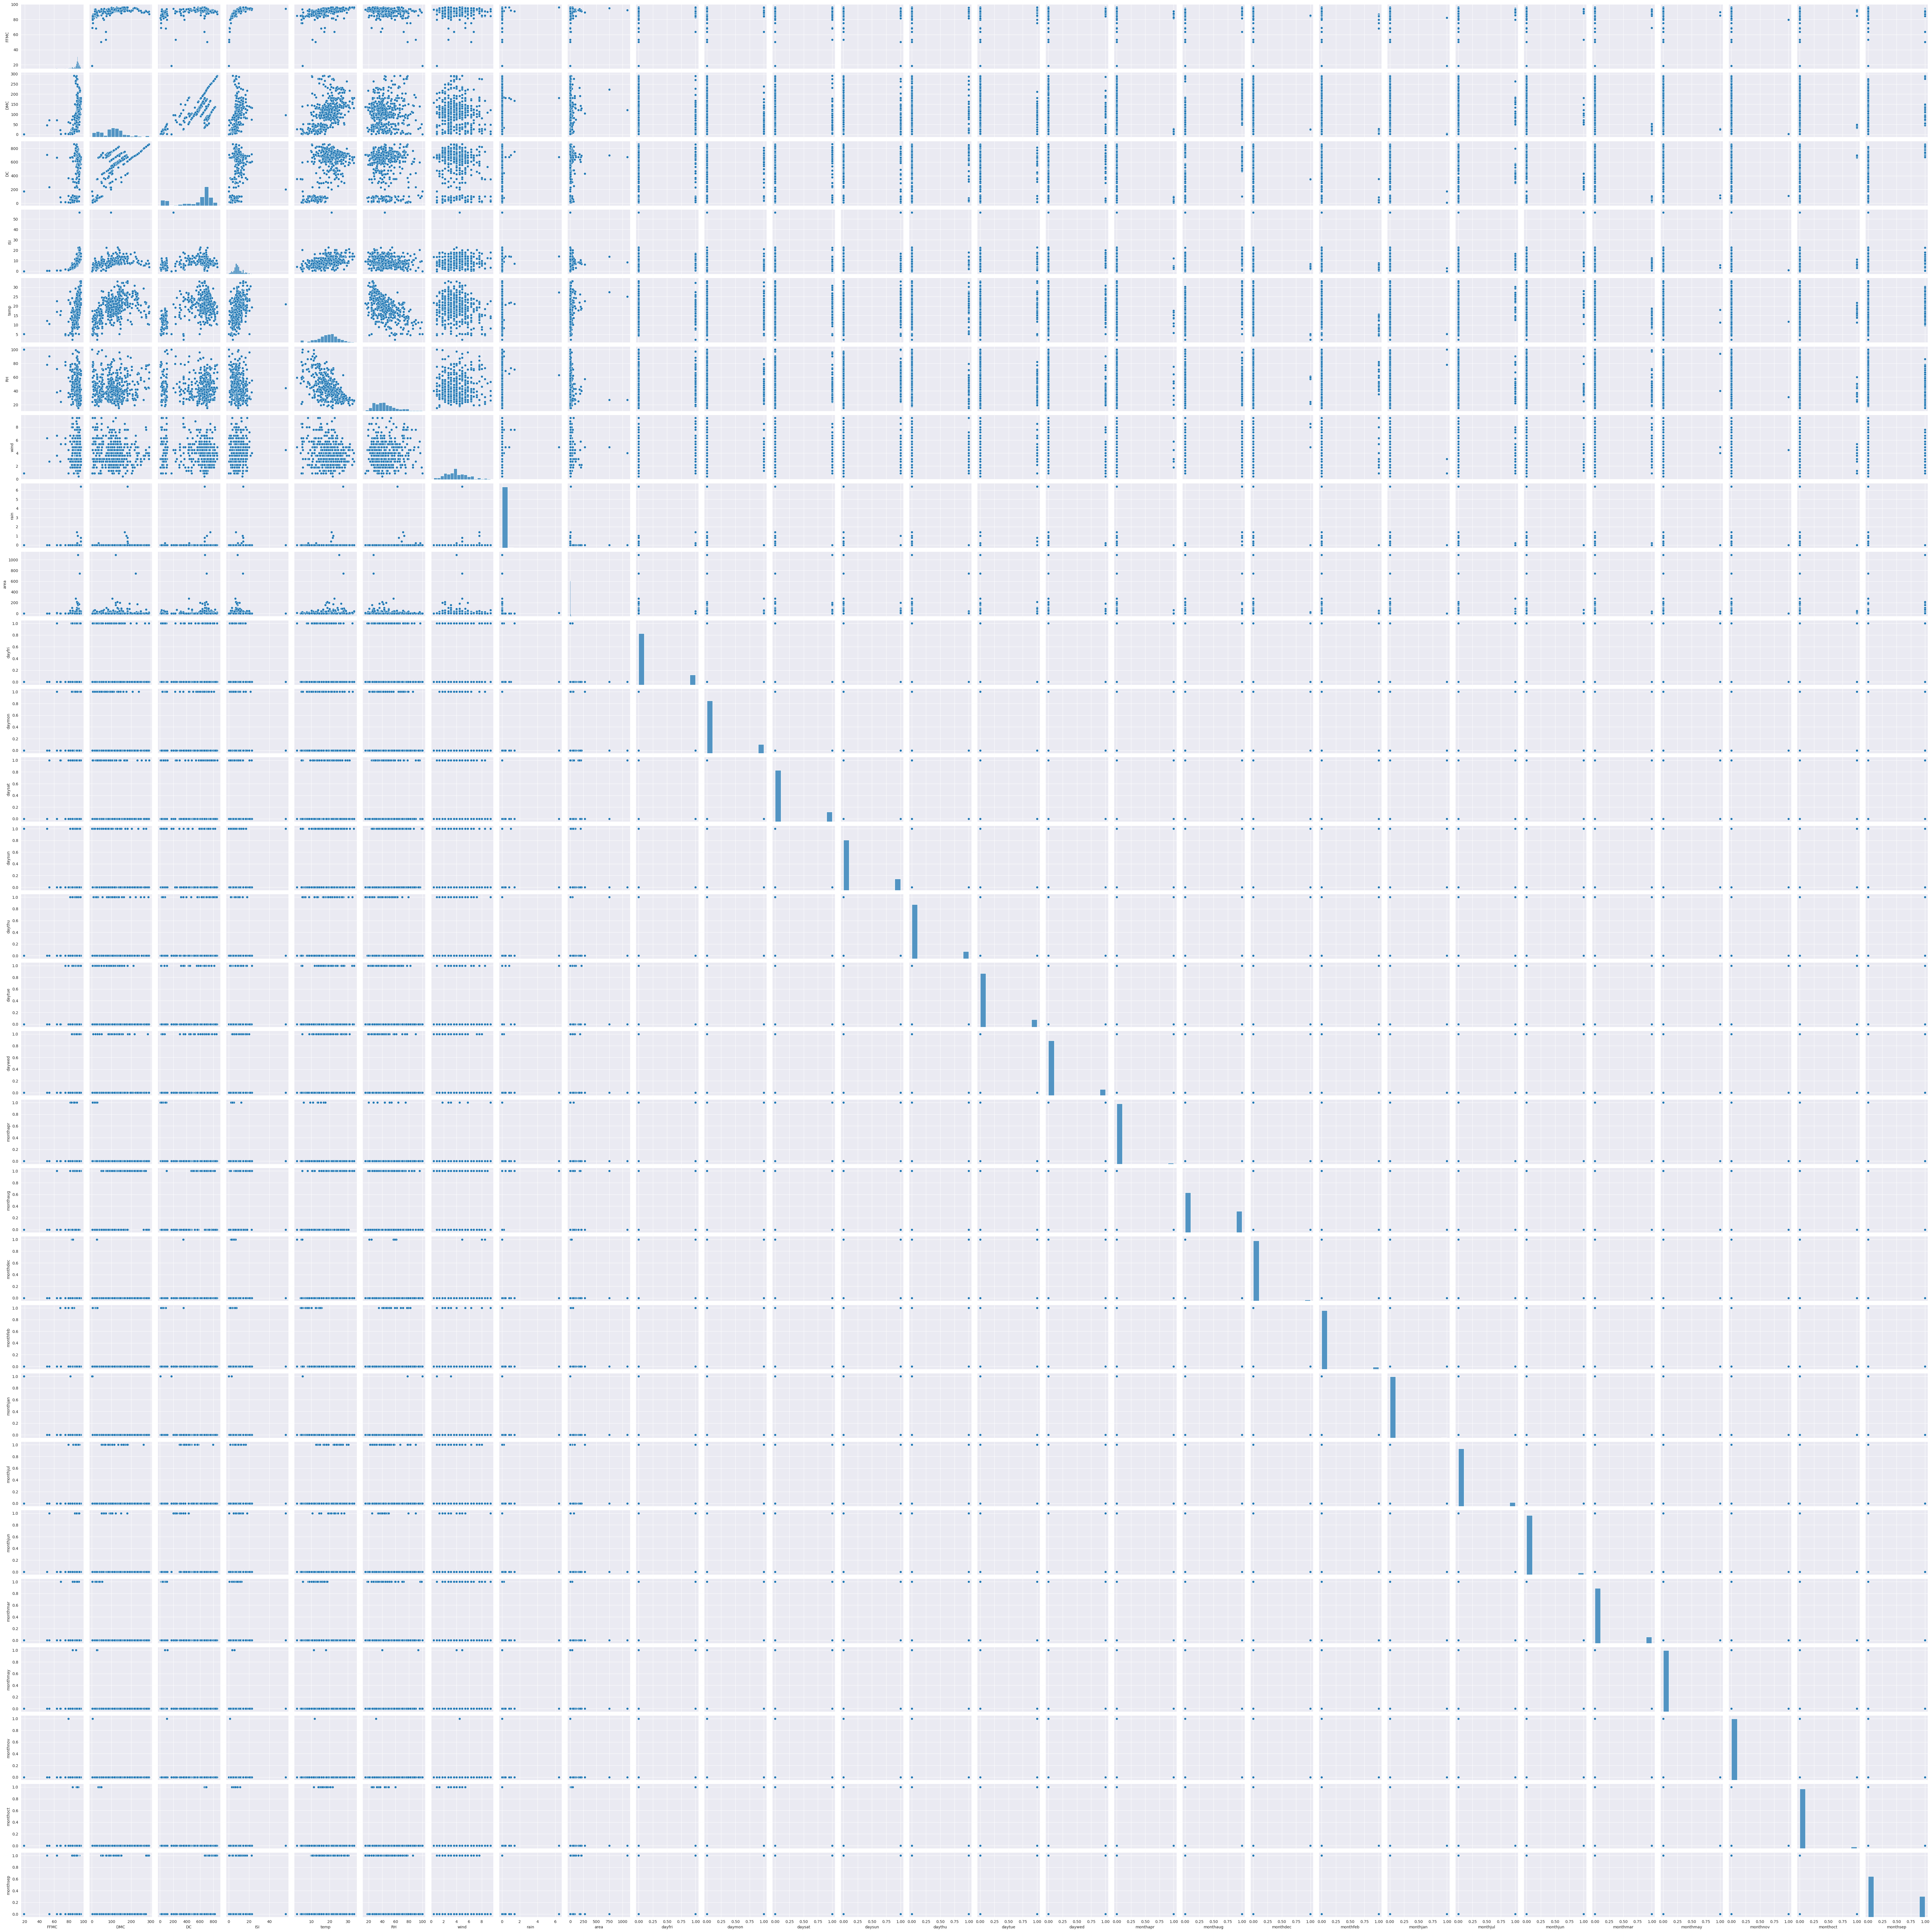

In [16]:
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
sns.pairplot(data)

plt.show()

In [29]:
data.size_category.replace(('large','small'),(1,0),inplace=True)

### **X and Y values**

In [30]:
# fix random seed for reproducibility

seed = 7
np.random.seed(seed)

X = data.iloc[:,2:30]
Y = data.iloc[:,-1]

# **Standardize data**

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [32]:
sc.fit_transform(X)

array([[-7.96039810e-01, -1.31838569e+00, -1.82893094e+00, ...,
        -4.43678255e-02, -1.74253759e-01, -7.14412875e-01],
       [-3.25665522e-03, -1.17405250e+00,  4.89256926e-01, ...,
        -4.43678255e-02,  5.73875712e+00, -7.14412875e-01],
       [-3.25665522e-03, -1.04383887e+00,  5.61044929e-01, ...,
        -4.43678255e-02,  5.73875712e+00, -7.14412875e-01],
       ...,
       [-1.62485856e+00, -8.39889805e-01,  4.75141308e-01, ...,
        -4.43678255e-02, -1.74253759e-01, -7.14412875e-01],
       [ 6.81419706e-01,  5.61083388e-01,  2.69859884e-01, ...,
        -4.43678255e-02, -1.74253759e-01, -7.14412875e-01],
       [-2.00323234e+00, -1.68235633e+00, -1.77892132e+00, ...,
         2.25388553e+01, -1.74253759e-01, -7.14412875e-01]])

In [33]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
512    1
513    1
514    1
515    0
516    0
Name: size_category, Length: 509, dtype: int64

In [34]:
X.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep'],
      dtype='object')

# **Create Model**

In [38]:
model= Sequential()

model.add(Dense(20, input_dim=28,  activation='relu')) #1st layer
model.add(Dense(10,  activation='relu')) #2nd layer  ##Hidden layer
model.add(Dense(10,  activation='relu')) #3nd layer  ##Hidden layer
model.add(Dense(1, activation='sigmoid')) #4rd layer or output layer

In [39]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
history = model.fit(X, Y, validation_split=0.40, epochs=100, batch_size=10)

Epoch 1/100
31/31 [==============================] - 3s 21ms/step - loss: 5.9152 - accuracy: 0.6820 - val_loss: 1.2353 - val_accuracy: 0.7255
Epoch 2/100
31/31 [==============================] - 0s 8ms/step - loss: 0.8537 - accuracy: 0.7344 - val_loss: 0.9951 - val_accuracy: 0.7304
Epoch 3/100
31/31 [==============================] - 0s 4ms/step - loss: 0.4732 - accuracy: 0.8098 - val_loss: 0.2819 - val_accuracy: 0.8578
Epoch 4/100
31/31 [==============================] - 0s 5ms/step - loss: 0.2546 - accuracy: 0.8820 - val_loss: 0.2386 - val_accuracy: 0.8922
Epoch 5/100
31/31 [==============================] - 0s 4ms/step - loss: 0.2360 - accuracy: 0.9016 - val_loss: 0.3539 - val_accuracy: 0.8431
Epoch 6/100
31/31 [==============================] - 0s 5ms/step - loss: 0.2383 - accuracy: 0.9115 - val_loss: 0.3603 - val_accuracy: 0.8333
Epoch 7/100
31/31 [==============================] - 0s 5ms/step - loss: 0.2243 - accuracy: 0.9115 - val_loss: 0.2397 - val_accuracy: 0.9461
Epoch 8/100


In [41]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

16/16 [==============================] - 0s 3ms/step - loss: 0.0979 - accuracy: 0.9666
accuracy: 96.66%


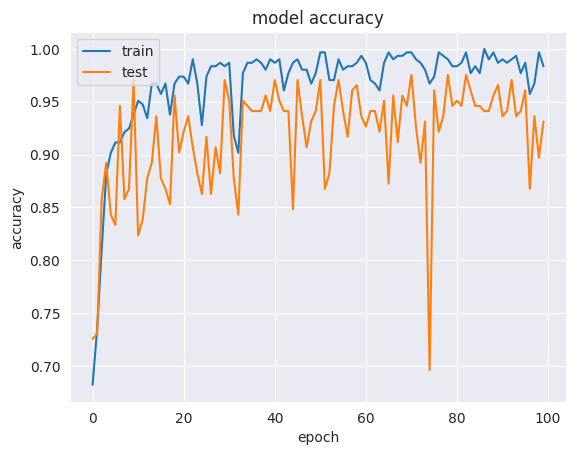

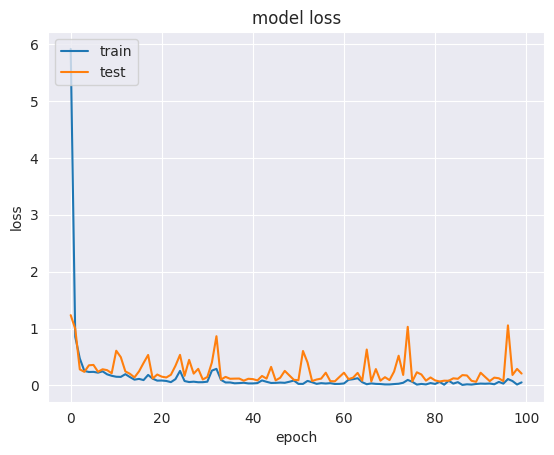

In [42]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()